# **EXTRACTION**

## Objectives

* Load bank churners dataset from [Kaggle](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data)
* Prelimenary examination of dataset for missing data, duplicates, unknown values and outliers
* Produce visualisations of dataset to aid in analysis and transformation
* Use the information to determine which columns are of most relevance to the hypotheses outlined in README
* Produce y-data profile of dataset to aid in depth analysis

## Inputs

* bank churners dataset from [Kaggle](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data)
* Collaborative feeedback and insights from all team members

## Outputs

* Visualisations and analysis of the raw data
* Y-data profiling html file showing detailed information on the raw dataset
* Insights and conclusions to inform the transformation phase (moved to Transformation notebook)

## Additional Comments

* Have opted to use html report y-data for ease of viewing and collaboration across platforms and to limit filesize
* Moved transformation phase to separate notebook for clarity and to reduce filesize



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/muhtarmuhtar/Documents/vscode-projects/Team1_Hackathon/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/muhtarmuhtar/Documents/vscode-projects/Team1_Hackathon'

# Setup

Import all the Python libraries required to carry out ETL (Extract, Transform, Load) and EDA (Exploratory Data Analysis).

In [4]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Removed unused imports


sns.set_theme(style="whitegrid") # Set seaborn theme for plots
pd.set_option('display.max_columns', None) # Display all columns in pandas DataFrames
# random_state = 1 # For reproducibility


---

# Extract


1. Import the raw dataset (`BankChurners.csv`) into a DataFrame.
2. Create a copy of the raw data to preserve the original.
3. Check the dataset’s dimensions (rows and columns).
4. Preview the first few rows to understand the structure and content.


In [5]:
# Load the raw data
df_raw = pd.read_csv('Data/Raw/BankChurners.csv')

# Make a copy of the raw data
df = df_raw.copy()

# Display the shape and first few rows of the dataframe
print(f'Row: {df.shape[0]}, Column: {df.shape[1]}')
df.head()


Row: 10127, Column: 23


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


---

# EDA (Initial Exploration)

The purpose of the Exploratory Data Analysis (EDA) section is to understand the dataset by exploring its characteristics, identifying patterns, detecting outliers, and generating hypotheses. We will use statistical summaries and visualisations to describe and analyse the data. The insights gained from the EDA will guide further analysis, modelling, and informed decision-making.

In [6]:
# Rename columns for clarity and ease of use
df.rename(columns=
          {"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1": "NB_attrition_flag_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2": "NB_attrition_flag_2"}, inplace=True)


In [7]:
# Display the shape and first few rows of the dataframe
print(f'Row: {df.shape[0]}, Column: {df.shape[1]}')
df.head()

Row: 10127, Column: 23


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NB_attrition_flag_1,NB_attrition_flag_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Missing Values Heatmap indicates there are no missing values in the dataframe.

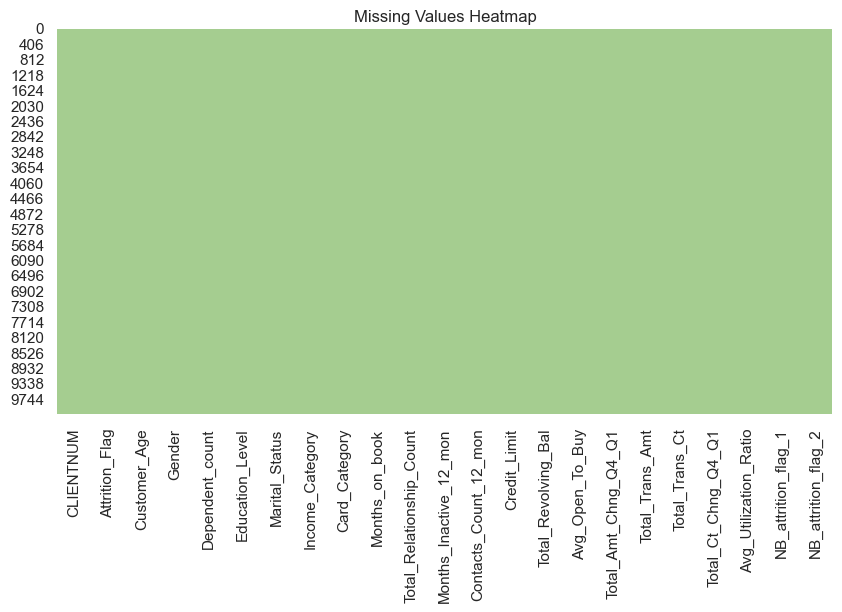

In [8]:
# Visualise missing values using a heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='crest')
plt.title("Missing Values Heatmap")
plt.show()

In [9]:
# Numeric summary statistics of the dataframe
# Transpose for better readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,7.080821e+08,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,2.600000e+01,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,1.300000e+01,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1.438300e+03,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.000000e+00,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.000000e+00,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


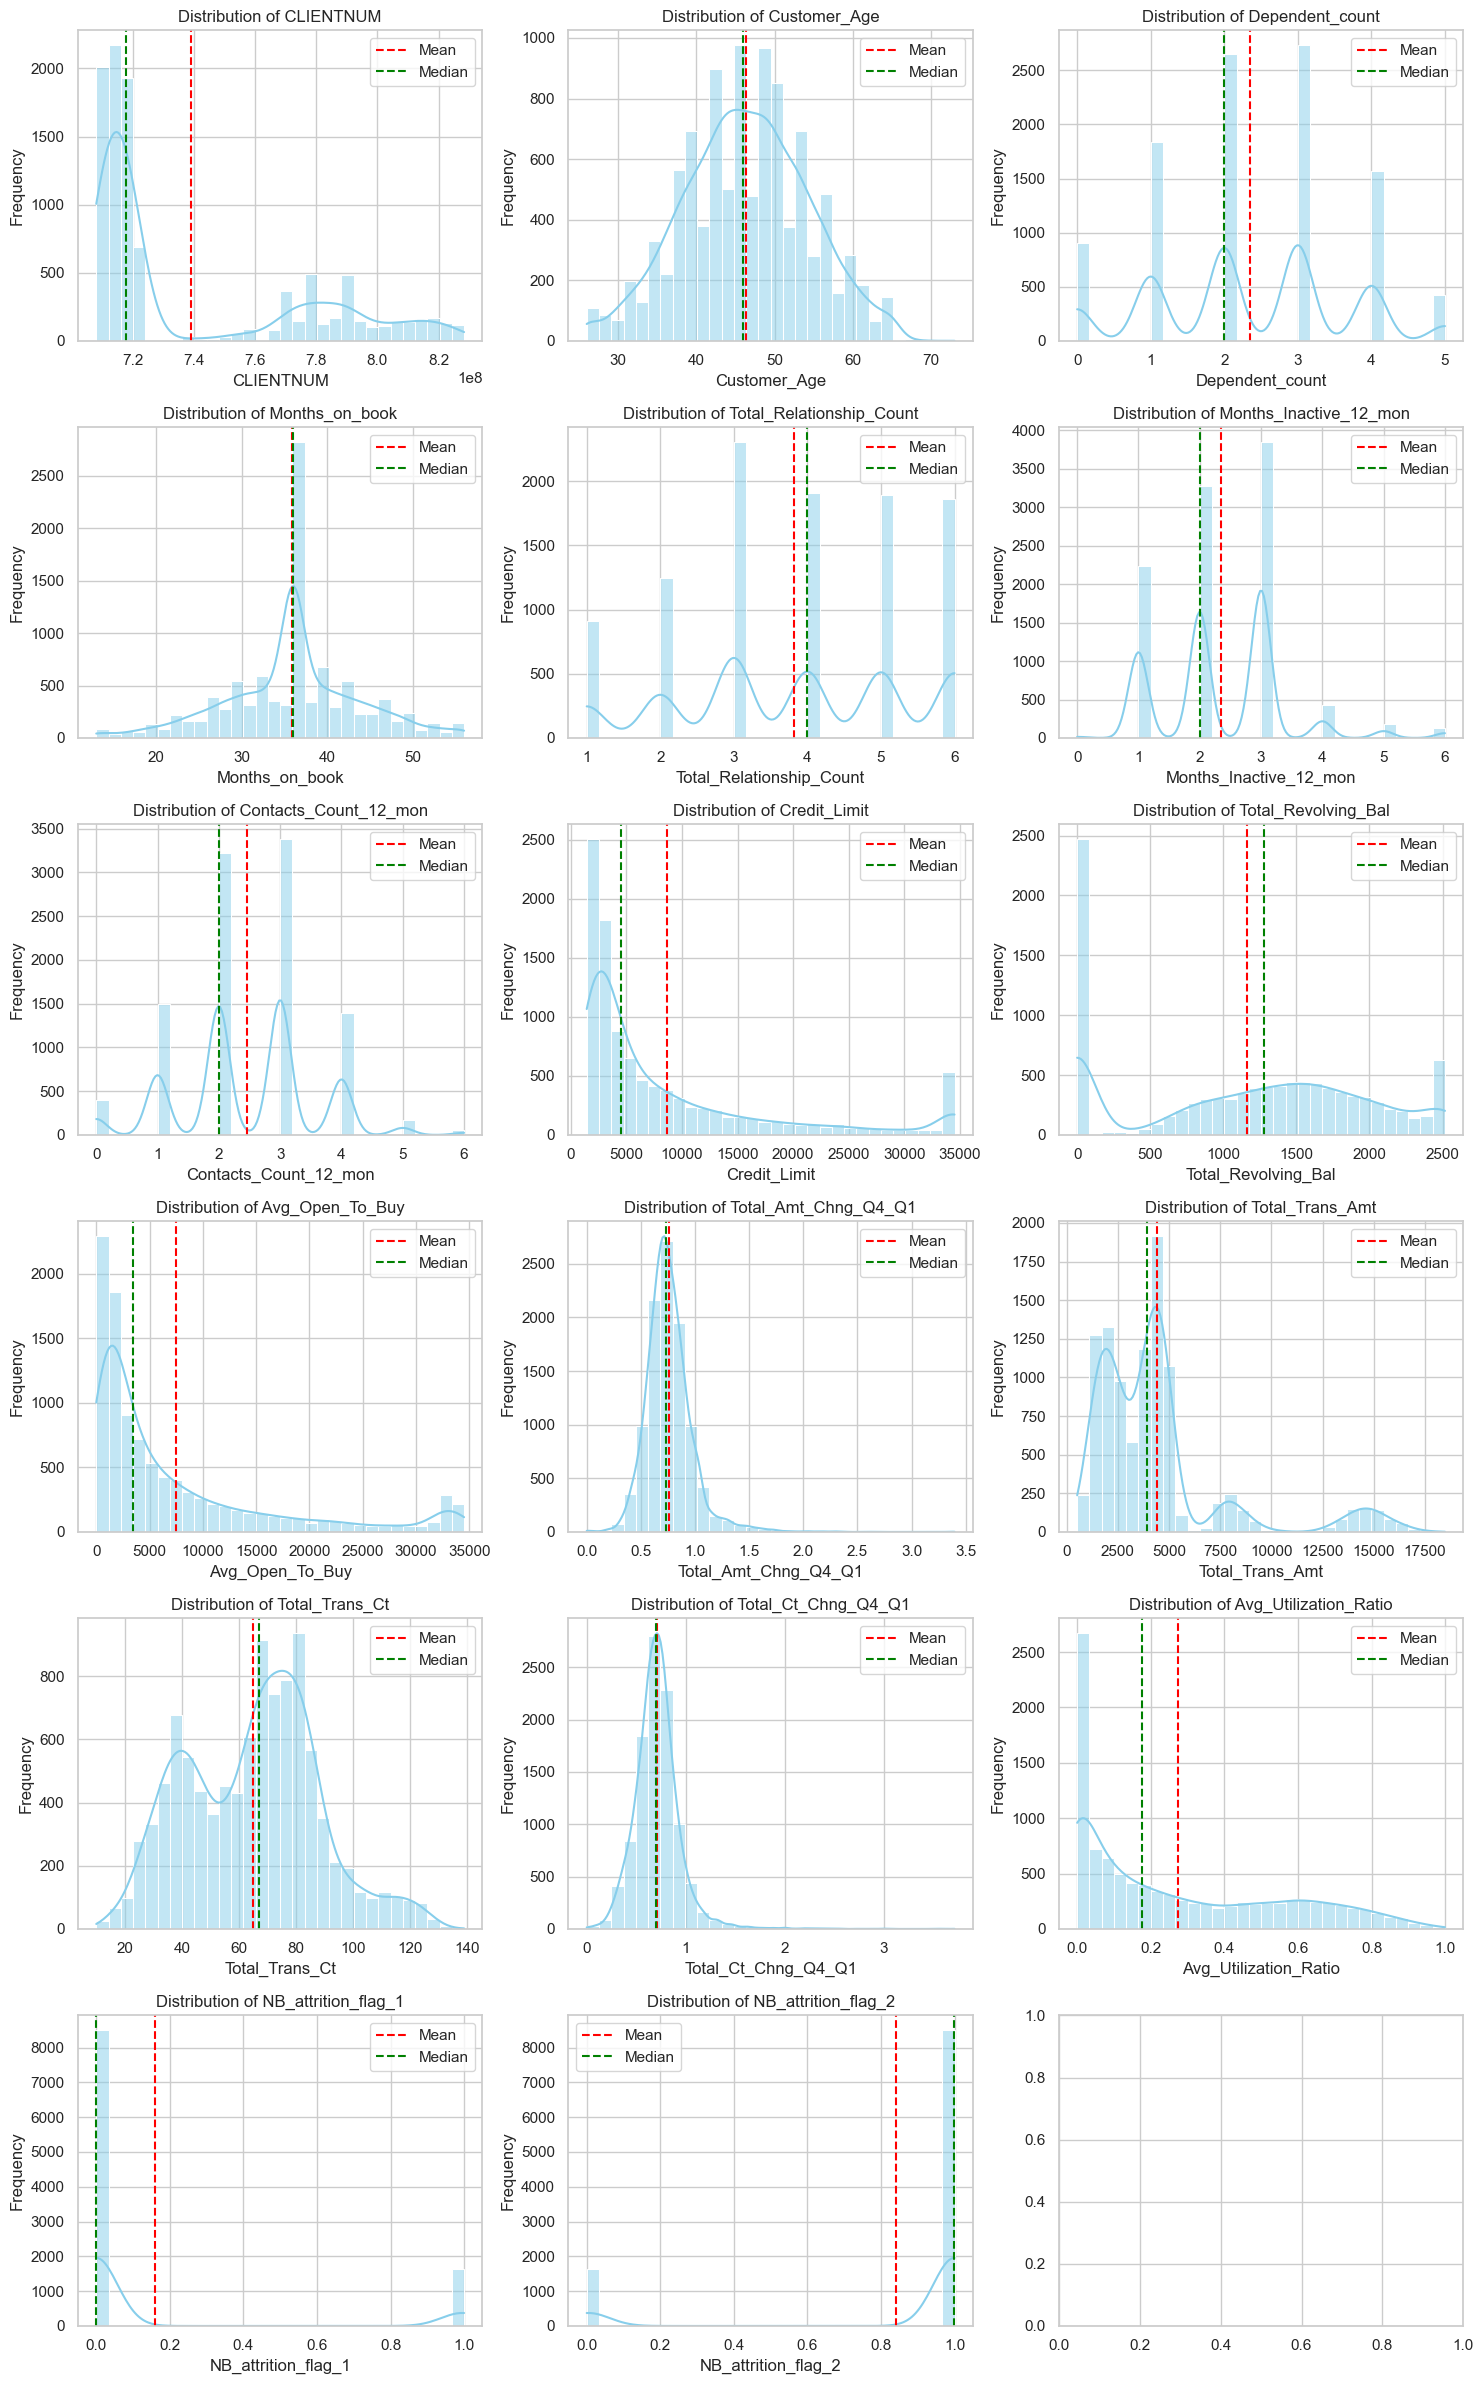

In [ ]:
'''distribution plots for numerical variables in subplots'''

# Identify numerical variables
num_vars = df.select_dtypes(include=['int64', 'float64']).columns

# Determine the number of rows and columns for the subplot grid
fig, axes = plt.subplots(nrows=len(num_vars)//3 + 1,
                         ncols=3, figsize=(15, 4 * ((len(num_vars)//3) + 1)))
axes = axes.flatten()

# Plot each numerical variable in a subplot
for i, col in enumerate(num_vars):
    data = df[col].dropna()
    sns.histplot(data, kde=True, bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].axvline(data.mean(), color='red', linestyle='--', label='Mean') # Mean line
    axes[i].axvline(data.median(), color='green',
                    linestyle='--', label='Median') # Median line
    axes[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout() 
plt.show()

## Column-by-Column Analysis of Numerical Variables

### 1. CLIENTNUM
- **Description:** Unique identifier for each client.  
- **Range:** 708,082,100 – 828,343,100  
- **Observations:** Sequential and evenly spread. Not analytically useful as a predictor.  
- **Insight:** Should be excluded from modelling.  

### 2. Customer_Age
- **Range:** 26 – 73  
- **Central Tendency:** Mean = 46.3, Median = 46  
- **Dispersion:** Std Dev = 8.0  
- **Distribution Shape:** Approximately normal, centered around mid-40s  
- **Insight:** Well-distributed with no major outliers; useful for segmentation and modelling.  

### 3. Dependent_count
- **Range:** 0 – 5  
- **Central Tendency:** Mean = 2.35, Median = 2  
- **Distribution Shape:** Discrete, slightly right-skewed (most customers have 1–3 dependents)  
- **Insight:** More categorical in nature; could be grouped or binned.  

### 4. Months_on_book (Customer Tenure)
- **Range:** 13 – 56  
- **Central Tendency:** Mean = 35.9, Median = 36  
- **Distribution Shape:** Symmetric, centered near 3 years  
- **Insight:** Stable distribution, no outliers; strong feature for churn/loyalty analysis.  

### 5. Total_Relationship_Count
- **Range:** 1 – 6  
- **Central Tendency:** Mean = 3.81, Median = 4  
- **Distribution Shape:** Discrete, roughly uniform  
- **Insight:** Represents customer engagement breadth; likely predictive of retention.  

### 6. Months_Inactive_12_mon
- **Range:** 0 – 6  
- **Central Tendency:** Mean = 2.34, Median = 2  
- **Distribution Shape:** Discrete, right-skewed  
- **Insight:** Higher values may signal attrition risk.  

### 7. Contacts_Count_12_mon
- **Range:** 0 – 6  
- **Central Tendency:** Mean = 2.46, Median = 2  
- **Distribution Shape:** Discrete, clustered around 2–3 contacts  
- **Insight:** Reflects engagement; potential churn indicator.  

### 8. Credit_Limit
- **Range:** 1,438 – 34,516  
- **Central Tendency:** Mean = 8,632, Median = 4,549  
- **Dispersion:** Std Dev = 9,089 (very high)  
- **Distribution Shape:** Strongly right-skewed  
- **Insight:** High outliers present; may need scaling or log transformation.  

### 9. Total_Revolving_Bal
- **Range:** 0 – 2,517  
- **Central Tendency:** Mean = 1,163, Median = 1,276  
- **Distribution Shape:** Fairly symmetric, capped near 2,500  
- **Insight:** Stable feature reflecting borrowing behavior.  

### 10. Avg_Open_To_Buy (Available Credit)
- **Range:** 3 – 34,516  
- **Central Tendency:** Mean = 7,469, Median = 3,474  
- **Distribution Shape:** Right-skewed (similar to Credit_Limit)  
- **Insight:** Strongly correlated with Credit_Limit and Total_Revolving_Bal.  

### 11. Total_Amt_Chng_Q4_Q1
- **Range:** 0 – 3.40  
- **Central Tendency:** Mean = 0.76, Median = 0.74  
- **Distribution Shape:** Right-skewed with high-value outliers  
- **Insight:** Most customers < 1; high ratios suggest rapid spending changes.  

### 12. Total_Trans_Amt
- **Range:** 510 – 18,484  
- **Central Tendency:** Mean = 4,404, Median = 3,899  
- **Dispersion:** Std Dev = 3,397  
- **Distribution Shape:** Right-skewed  
- **Insight:** Outliers exist; log scaling may help. Strong predictor of engagement.  

### 13. Total_Trans_Ct
- **Range:** 10 – 139  
- **Central Tendency:** Mean = 65, Median = 67  
- **Distribution Shape:** Fairly normal  
- **Insight:** Strongly linked to spending activity; highly predictive of churn/retention.  

### 14. Total_Ct_Chng_Q4_Q1
- **Range:** 0 – 3.71  
- **Central Tendency:** Mean = 0.71, Median = 0.70  
- **Distribution Shape:** Right-skewed, with extreme outliers  
- **Insight:** Captures shifts in customer activity; key churn indicator.  

### 15. Avg_Utilization_Ratio
- **Range:** 0.00 – 1.00  
- **Central Tendency:** Mean = 0.27, Median = 0.18  
- **Distribution Shape:** Right-skewed; majority < 0.5  
- **Insight:** Already normalized; excellent measure of credit behavior.  

### 16. NB_attrition_flag_1 & NB_attrition_flag_2
- **Range:** Near 0 or 1 (binary encoded)  
- **Central Tendency:** Mean ≈ 0.16 (Flag 1), 0.84 (Flag 2)  
- **Distribution Shape:** Binary categorical  
- **Insight:** These flags show how the target variable is encoded. Flag 1 indicates that the customer left, while Flag 2 indicates that the customer stayed.  


## General Observations
- **Normal vs Skewed:** Customer_Age, Months_on_book, and Total_Trans_Ct are near-normal; Credit_Limit, Total_Trans_Amt, and ratio features are skewed.  
- **Outliers:** Notable in Credit_Limit, Total_Trans_Amt, Total_Amt_Chng_Q4_Q1, and Total_Ct_Chng_Q4_Q1.  
- **Scaling Needs:** Log transformations recommended for heavily skewed features.  
- **Predictive Strength:** Transactional and ratio-based variables are likely the strongest predictors of churn. 


## Analysis Summary

The dataset contains customer demographic, relationship, and transaction-based variables. Most demographic features, such as customer age and Months on Book (tenure), are normally distributed. They exhibit stable patterns, making them reliable for identifying customer segments and tracking retention trends. Features such as Dependent Count and Relationship Count act more like categorical values. They highlight differences in family size and banking engagement.

Financial and behavioural features are more variable. Variables such as credit limit, Available Credit, and Transaction Amounts are highly skewed. A few customers hold very high values. These outliers may distort the analysis unless normalised or transformed. Activity-based measures, such as Total Transactions, Transaction Amount Change, and Contact/Inactive Months, indicate engagement and risk of churn. Sharp changes in activity are early warning signals for attrition.

Demographic variables offer a stable baseline for segmentation. For effective predictive modelling, prioritise transaction-related and utilisation features over demographics. Address skewness and outliers carefully, and focus specifically on spending, activity change ratios, and credit utilisation. Use these as primary indicators when assessing customer loyalty and attrition.

In [11]:
# Categorical summary statistics of the dataframe
# Transpose for better readability
df.describe(include='object').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


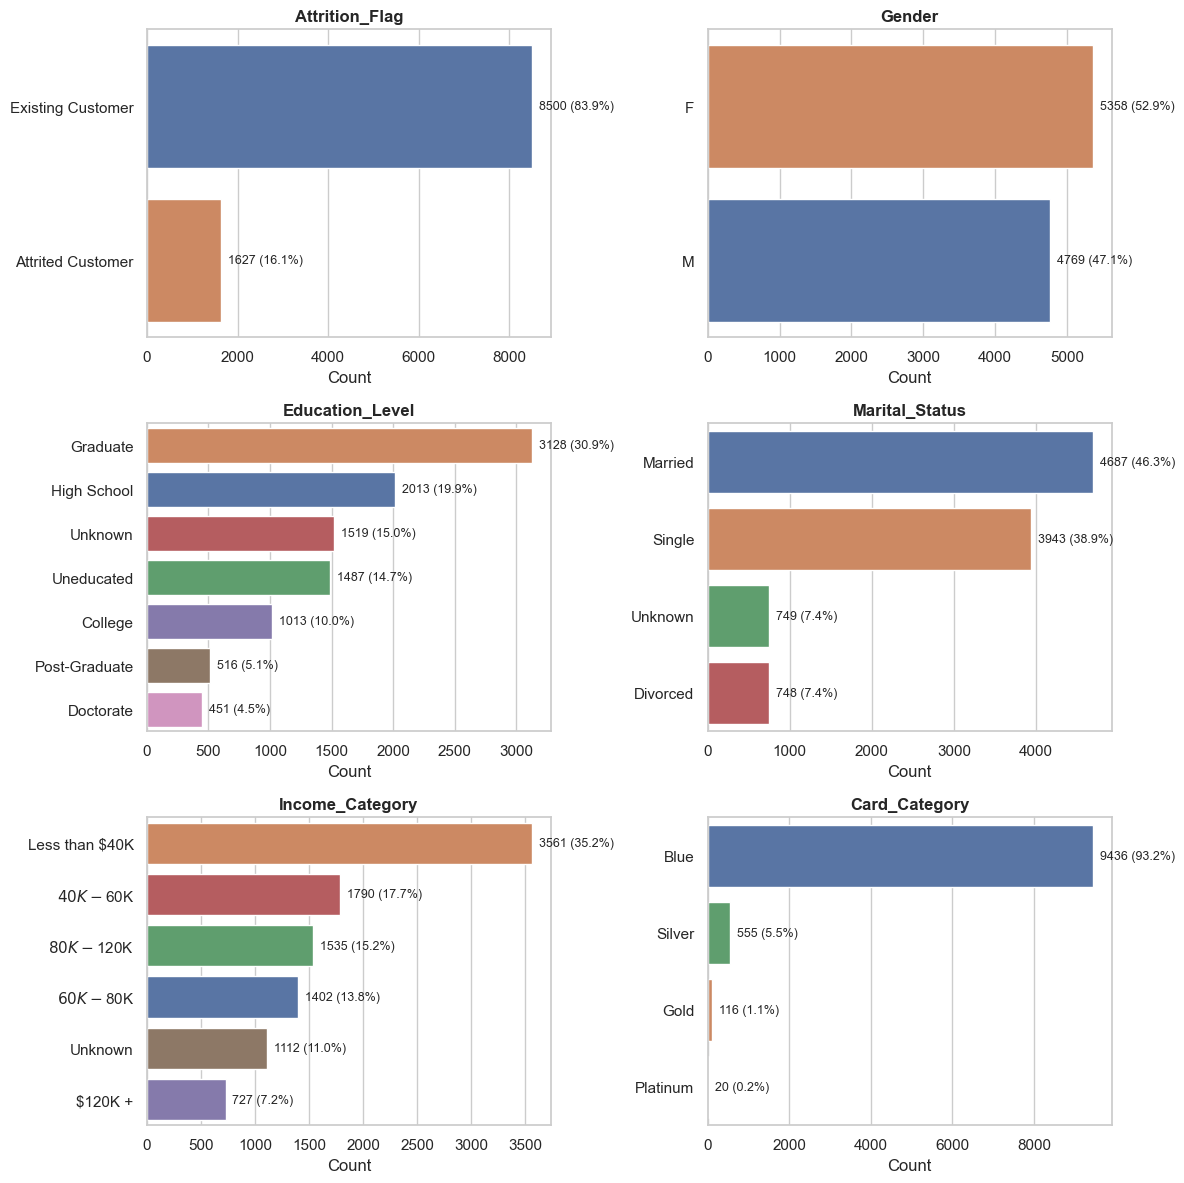

In [ ]:
import math
'''Count plots for categorical variables in subplots with counts and percentages annotated'''

# Identify categorical variables
cat_vars = df.select_dtypes(include=['object', 'category']).columns

# Determine the number of rows and columns for the subplot grid
fig, axes = plt.subplots(nrows=math.ceil(len(cat_vars) / 2), ncols=2, figsize=(6 * 2, 4 * math.ceil(len(cat_vars) / 2)))
axes = axes.flatten()

# Plot each categorical variable in a subplot
for i, col in enumerate(cat_vars):
    ax = axes[i]
    order = df[col].value_counts().index
    sns.countplot(
        y=col,
        data=df,
        order=order,
        hue=col, legend=False,
        ax=ax
    )

# Annotate bars with counts and percentages
    total = len(df[col])
    for p in ax.patches:
        count = int(p.get_width())
        percentage = 100 * count / total
        ax.annotate(f'{count} ({percentage:.1f}%)',
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center',
                    xytext=(5, 0),
                    textcoords='offset points',
                    fontsize=9)

 # Set titles and labels   
    ax.set_title(f'{col}', fontsize=12, weight='bold')
    ax.set_xlabel('Count')
    ax.set_ylabel('')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Column-by-Column Analysis of Categorical Variables

### 1. Attrition_Flag
- **Count:** 10,127  
- **Unique:** 2 categories — *Existing Customer*, *Attrited Customer*  
- **Top:** Existing Customer (8,500 occurrences)  
- **Distribution:** ~84% Existing vs. ~16% Attrited  
- **Potential Bias:** Class imbalance may bias models toward predicting *Existing Customer*.

### 2. Gender
- **Count:** 10,127  
- **Unique:** 2 categories — *F*, *M*  
- **Top:** Female (5,358, ~53%)  
- **Distribution:** Roughly balanced, slightly more females  
- **Potential Bias:** Minimal; no serious skew.

### 3. Education_Level
- **Count:** 10,127 *(some "Unknown" values)*  
- **Unique:** 7 categories — *Graduate* most common (3,128)  
- **Distribution:** Moderate spread, but graduates dominate  
- **Potential Bias:** Rare categories may not generalise well.

### 4. Marital_Status
- **Count:** 10,127 *(some "Unknown" values)*  
- **Unique:** 4 categories — *Married* most common (4,687)  
- **Distribution:** Skewed toward married individuals, but other categories have decent representation  
- **Potential Bias:** May bias the model if attrition strongly correlates with marital status.

### 5. Income_Category
- **Count:** 10,127  
- **Unique:** 6 categories — *Less than $40K* most common (3,561)  
- **Distribution:** Skew toward lower income categories  
- **Potential Bias:** Income distribution could bias predictions if attrition is linked to certain income brackets.

### 6. Card_Category
- **Count:** 10,127  
- **Unique:** 4 categories — *Blue* dominates (9,436)  
- **Distribution:** Extremely imbalanced (~93% Blue)  
- **Potential Bias:** Minority card categories may be ignored by the model.


## Overall Observations

### 1. Imbalance in Target (Attrition_Flag)
- Target variable is imbalanced: 84% *Existing* vs. 16% *Attrited*.  
- **Mitigation:** Consider resampling, class weighting, or specialised algorithms.

### 2. Low Cardinality Across Features
- All categorical variables have ≤ 7 categories.  
- **Impact:** One-hot encoding is efficient and straightforward.

### 3. Dominant Categories
- Some variables are dominated by a single category (e.g., *Card_Category = Blue*, 93%).  
- **Mitigation:** Consider grouping rare categories into "Other".

### 4. Potential for Ordinal Encoding
- *Income_Category* has a natural ranking.  
- **Impact:** Ordinal encoding could preserve order and reduce feature sparsity.

### 5. Unknown / Missing-Type Categories
- *Education_Level* and *Marital_Status* contain "Unknown" entries.  
- **Mitigation:** Retain as a separate category or impute, depending on modelling goals.


## Analysis Summary

The dataset includes six categorical variables: Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Category, and Card_Category. While Attrition_Flag, the target variable, is highly imbalanced (84% labeled as "Existing," 16% as "Attrited"), this imbalance must be addressed to prevent bias. All features have low cardinality, which enables efficient encoding. Some variables, such as Card_Category, are dominated by a single class: for example, "Blue" accounts for 93% of the records. Rare classes in these variables require careful handling. Income_Category is ordinal, so encoding that preserves rank can improve interpretability and reduce sparsity. To maintain data integrity, variables containing "Unknown" values should be managed. Although the dataset is suitable for categorical encoding, targeted preprocessing remains necessary to address imbalance, dominant categories, missing values, and to leverage ordinal information.

### Add y-data to project for further analysis

In [13]:
#create a ydata profile report
from ydata_profiling import ProfileReport

df = pd.read_csv("Data/Raw/BankChurners.csv")
profile = ProfileReport(df, title="Bank Churners Data Profile")
profile.to_file(output_file="Data/Processed/bank_churners_profile.html")



ModuleNotFoundError: No module named 'pkg_resources'

### Initial Analysis of Y-data

The dataset is largely clean, though there are some columns which need further attention.
*  both marital_status and education_level have undefined or unknown values
*  There are some columns with outliers which may need further analysis
*  CLIENTNUM has 100% unique values showing there are no duplicates in the dataset and that it is an identity column and may be removed
*  Other columns do not contribute information relevant to our hypotheses (Naive_Bayes 1 & 2) and may be removed

---

# Transform

Transformation moved to transformation notebook

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
# import os
# try:
#   # create your folder here
#   # os.makedirs(name='')
# except Exception as e:
#   print(e)
